In [1]:
from google.colab import files
uploaded = files.upload()
list(uploaded.keys())


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


['Titanic-Dataset.csv']

In [2]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing)
df.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()


/tmp/ipython-input-1612963577.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1612963577.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])      # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])


In [6]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression predictions
y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Random Forest predictions
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Logistic Regression Accuracy:", round(acc_lr*100, 2), "%")
print("Random Forest Accuracy:", round(acc_rf*100, 2), "%")


Logistic Regression Accuracy: 80.45 %
Random Forest Accuracy: 82.68 %


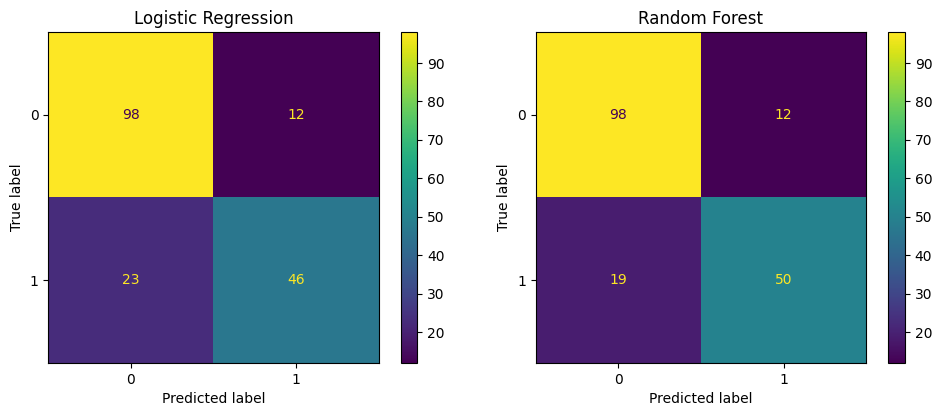

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Logistic Regression CM
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot(ax=axes[0])
axes[0].set_title("Logistic Regression")

# Random Forest CM
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(ax=axes[1])
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


In [11]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [acc_lr, acc_rf]
})
results


,Model,Accuracy
0,Logistic Regression,0.804469
1,Random Forest,0.826816


In [16]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [17]:
# Auto-detect and handle both cases
if 'sibsp' in df.columns:
    sibsp_col, parch_col = 'sibsp', 'parch'
else:
    sibsp_col, parch_col = 'SibSp', 'Parch'

df['family_size'] = df[sibsp_col] + df[parch_col] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)


In [19]:
print(df.columns.tolist())


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'family_size', 'is_alone']


In [20]:
import pandas as pd

# Create bands
df['AgeBand'] = pd.cut(df['Age'], bins=[0,12,18,35,60,80], labels=[0,1,2,3,4])
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=[0,1,2,3])

# Confirm they were added
df[['Age', 'AgeBand', 'Fare', 'FareBand']].head()


,Age,AgeBand,Fare,FareBand
0,22.0,2,7.2500,0
1,38.0,3,71.2833,3
2,26.0,2,7.9250,1
3,35.0,2,53.1000,3
4,35.0,2,8.0500,1


In [21]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked',
        'family_size','is_alone','AgeBand','FareBand']]
y = df['Survived']


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, scoring='accuracy', cv=5, random_state=42, n_jobs=-1
)

search.fit(X_train, y_train)
best_rf = search.best_estimator_
print("✅ best_rf is now defined.")


✅ best_rf is now defined.


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data again (optional but safe)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Retrain Logistic Regression with updated X
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Now predict safely
y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("🔹 Logistic Regression Accuracy: {:.2f}%".format(acc_lr * 100))


🔹 Logistic Regression Accuracy: 81.01%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
!pip install xgboost


In [33]:
from xgboost import XGBClassifier



In [35]:
# Convert category columns to numeric (int)
X['AgeBand'] = X['AgeBand'].astype(int)
X['FareBand'] = X['FareBand'].astype(int)

# If you already split before, redo it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


/tmp/ipython-input-2530229540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AgeBand'] = X['AgeBand'].astype(int)
/tmp/ipython-input-2530229540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['FareBand'] = X['FareBand'].astype(int)


In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb.fit(X_train, y_train)
print("✅ XGBoost trained successfully!")

from sklearn.metrics import accuracy_score
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("🚀 XGBoost Accuracy: {:.2f}%".format(acc_xgb * 100))


✅ XGBoost trained successfully!
🚀 XGBoost Accuracy: 79.33%


In [37]:
X.dtypes


,0
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64
family_size,int64
is_alone,int64
AgeBand,int64


In [38]:
xgb = XGBClassifier(
    n_estimators=300,      # number of trees
    learning_rate=0.05,    # smaller = slower but more accurate
    max_depth=5,           # depth of trees
    random_state=42
)

xgb.fit(X_train, y_train)
print("✅ XGBoost model trained successfully!")



✅ XGBoost model trained successfully!


In [39]:
from sklearn.metrics import accuracy_score

y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("🚀 XGBoost Accuracy: {:.2f}%".format(acc_xgb * 100))


🚀 XGBoost Accuracy: 79.33%


In [40]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Tuned Random Forest', 'XGBoost'],
    'Accuracy (%)': [acc_lr*100, acc_rf*100, acc_xgb*100]
})
print(results)


                 Model  Accuracy (%)
0  Logistic Regression     81.005587
1  Tuned Random Forest     78.770950
2              XGBoost     79.329609


In [41]:
from sklearn.metrics import accuracy_score

# 1️⃣ Logistic Regression
y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# 2️⃣ Tuned Random Forest
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# 3️⃣ XGBoost (if trained)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# 📊 Print results together
print("🔹 Logistic Regression Accuracy: {:.2f}%".format(acc_lr * 100))
print("🔹 Tuned Random Forest Accuracy: {:.2f}%".format(acc_rf * 100))
print("🔹 XGBoost Accuracy: {:.2f}%".format(acc_xgb * 100))


🔹 Logistic Regression Accuracy: 81.01%
🔹 Tuned Random Forest Accuracy: 78.77%
🔹 XGBoost Accuracy: 79.33%


In [42]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked',
        'family_size','is_alone']]  # Don't include AgeBand or FareBand


In [43]:
search.fit(X_train, y_train)
best_rf = search.best_estimator_


In [44]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("🚀 XGBoost Accuracy: {:.2f}%".format(acc_xgb * 100))


🚀 XGBoost Accuracy: 79.33%


In [45]:
from sklearn.metrics import accuracy_score

# 1️⃣ Logistic Regression
y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# 2️⃣ Tuned Random Forest
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# 3️⃣ XGBoost (if trained)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# 📊 Print results together
print("🔹 Logistic Regression Accuracy: {:.2f}%".format(acc_lr * 100))
print("🔹 Tuned Random Forest Accuracy: {:.2f}%".format(acc_rf * 100))
print("🔹 XGBoost Accuracy: {:.2f}%".format(acc_xgb * 100))



🔹 Logistic Regression Accuracy: 81.01%
🔹 Tuned Random Forest Accuracy: 78.77%
🔹 XGBoost Accuracy: 79.33%


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [47]:
print(X_train.shape, X_test.shape)
print(X_train.columns)
print(X_test.columns)
print(X.isnull().sum())


(712, 9) (179, 9)
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'family_size', 'is_alone'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'family_size', 'is_alone'],
      dtype='object')
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
family_size    0
is_alone       0
dtype: int64


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_rf = RandomForestClassifier(
    n_estimators=500,          # more trees for stability
    max_depth=10,              # controls overfitting
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',       # good for tabular data
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("🎯 Improved Random Forest Accuracy: {:.2f}%".format(acc_rf * 100))


🎯 Improved Random Forest Accuracy: 79.89%


In [49]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.2,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import accuracy_score
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("🚀 Improved XGBoost Accuracy: {:.2f}%".format(acc_xgb * 100))


🚀 Improved XGBoost Accuracy: 81.01%


In [50]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("📈 Logistic Regression Accuracy: {:.2f}%".format(acc_lr * 100))


📈 Logistic Regression Accuracy: 80.45%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy (%)': [acc_lr*100, acc_rf*100, acc_xgb*100]
})
print(results)


                 Model  Accuracy (%)
0  Logistic Regression     80.446927
1        Random Forest     79.888268
2              XGBoost     81.005587


In [52]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Title'] = le.fit_transform(df['Title'])


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2559589710.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [53]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked',
        'family_size','is_alone','Title']]


In [55]:
df['Age'] = df.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [58]:
# Extract title
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Title'] = le.fit_transform(df['Title'])

# ✅ Fill missing Age using Title + Pclass grouping
df['Age'] = df.groupby(['Title','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2320262762.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [59]:
df['Age'].isnull().sum()


np.int64(0)

In [61]:
# Fill missing Age values based on Title and Pclass group medians
df['Age'] = df['Age'].fillna(
    df.groupby(['Title', 'Pclass'])['Age'].transform('median')
)


In [62]:
df['Age'].isnull().sum()


np.int64(0)

In [64]:
# Safety: ensure 'Title' and 'Pclass' exist
assert 'Title' in df.columns and 'Pclass' in df.columns, "Title/Pclass missing!"

# ✅ Correct way: use transform, not apply
df['Age'] = df['Age'].fillna(
    df.groupby(['Title', 'Pclass'])['Age'].transform('median')
)

# Global fallback for any still-NaN rows
df['Age'] = df['Age'].fillna(df['Age'].median())

print("Remaining null Ages:", df['Age'].isnull().sum())


Remaining null Ages: 0


In [65]:
df.info()           # Age should now be float64 with 0 nulls
df[['Title','Pclass','Age']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    int64   
 11  family_size  891 non-null    int64   
 12  is_alone     891 non-null    int64   
 13  AgeBand      891 non-null    category
 14  FareBand     891 non-null    category
 15  Title        891 non-null    int64   
dtypes: category(2), float64(2), int64(10), object(2)
memory usage: 99.7+ KB


,Title,Pclass,Age
0,2,3,22.0
1,3,1,38.0
2,1,3,26.0
3,3,1,35.0
4,2,3,35.0


In [66]:
df['Age'] = df['Age'].fillna(
    df.groupby(['Title', 'Pclass'])['Age'].transform('median')
)


In [67]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [68]:
# Fill missing Embarked with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill missing Fare (if any) with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

print("✅ Missing values fixed!")
print(df.isnull().sum())


✅ Missing values fixed!
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
family_size    0
is_alone       0
AgeBand        0
FareBand       0
Title          0
dtype: int64


In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])          # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Title'] = le.fit_transform(df['Title'])

print("✅ Encoding complete!")
df[['Sex', 'Embarked', 'Title']].head()


✅ Encoding complete!


,Sex,Embarked,Title
0,1,2,2
1,0,0,3
2,0,2,1
3,0,2,3
4,1,2,2


In [70]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked',
        'family_size','is_alone','Title']]
y = df['Survived']


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split complete!")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


✅ Data split complete!
Training shape: (712, 10)
Testing shape: (179, 10)


In [72]:
!pip install xgboost


In [73]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [74]:
xgb = XGBClassifier(
    n_estimators=800,       # number of trees
    learning_rate=0.02,     # smaller = slower but more accurate
    max_depth=5,            # tree depth (avoid overfitting)
    subsample=0.85,         # use 85% of training data per tree
    colsample_bytree=0.85,  # use 85% of features per tree
    gamma=0.1,              # regularization
    reg_lambda=1.0,         # L2 regularization
    random_state=42,
    n_jobs=-1
)

# Train on training data
xgb.fit(X_train, y_train)
print("✅ XGBoost training complete!")


✅ XGBoost training complete!


In [75]:
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("🚀 XGBoost Model Accuracy: {:.2f}%".format(acc_xgb * 100))


🚀 XGBoost Model Accuracy: 82.12%


In [76]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [77]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Random Forest
best_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)

print("✅ Logistic Regression and Random Forest trained!")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression and Random Forest trained!


In [78]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', best_rf),
        ('xgb', xgb)
    ],
    voting='soft'  # 'soft' means uses probabilities for smoother voting
)

voting_clf.fit(X_train, y_train)
print("✅ Ensemble model trained successfully!")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Ensemble model trained successfully!


In [79]:
y_pred_vote = voting_clf.predict(X_test)
acc_vote = accuracy_score(y_test, y_pred_vote)

print("🤝 Ensemble (Voting) Model Accuracy: {:.2f}%".format(acc_vote * 100))


🤝 Ensemble (Voting) Model Accuracy: 83.80%


In [80]:
from sklearn.metrics import accuracy_score
import pandas as pd

# 1️⃣ Logistic Regression
y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# 2️⃣ Random Forest
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# 3️⃣ XGBoost
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# 4️⃣ Voting Ensemble
y_pred_vote = voting_clf.predict(X_test)
acc_vote = accuracy_score(y_test, y_pred_vote)

# 📊 Compare All Models
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Voting Ensemble'],
    'Accuracy (%)': [acc_lr*100, acc_rf*100, acc_xgb*100, acc_vote*100]
})

print("✅ Final Model Accuracies:")
print(results.sort_values(by='Accuracy (%)', ascending=False).reset_index(drop=True))


✅ Final Model Accuracies:
                 Model  Accuracy (%)
0      Voting Ensemble     83.798883
1        Random Forest     82.122905
2              XGBoost     82.122905
3  Logistic Regression     80.446927
